<a href="https://colab.research.google.com/github/aaolcay/Traditional-Machine-Learning-Techniques/blob/main/He_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Weight Initialization Methods: Zeros, Random, He Initializations**
Weight initialization is an important part of deep learning because it can have a significant impact on the performance of the model. The weights of the neural network are randomly initialized before training, and the choice of initialization method can affect the convergence speed, optimization stability, and the ability of the model to avoid getting stuck in local minima.

One popular initialization method is the He initialization, which is designed specifically for ReLU activation functions. The idea behind He initialization is to set the initial weights to small random values that are proportional to the square root of the number of input units to the layer. This helps to ensure that the variance of the outputs of each layer remains approximately constant during training, which can improve the performance of the model.

Here's an example code snippet that compares the performance of three different weight initialization methods (zero initialization, random initialization, and He initialization) on a simple neural network:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We generate a dataset consists of 1000 examples and a binary label (`0` or `1`). The values are randomly generated from a normal distribution with mean 0 and standard deviation 1.

The label of each example is determined by a decision boundary, which is a straight line defined by the equation `y = mx + b`, where m and b are the slope and intercept of the line, respectively. In this dataset, the decision boundary is set to `y = 2x + 1`.

To generate the labels, we calculate the value of `y` for each example using the decision boundary equation. If the value of `y` is greater than or equal to 0, we assign the `label 1` to the example. Otherwise, we assign the `label 0`.

The dataset is split into a training set of 800 examples and a test set of 200 examples. The training set is used to train the logistic regression model, while the test set is used to evaluate its performance.

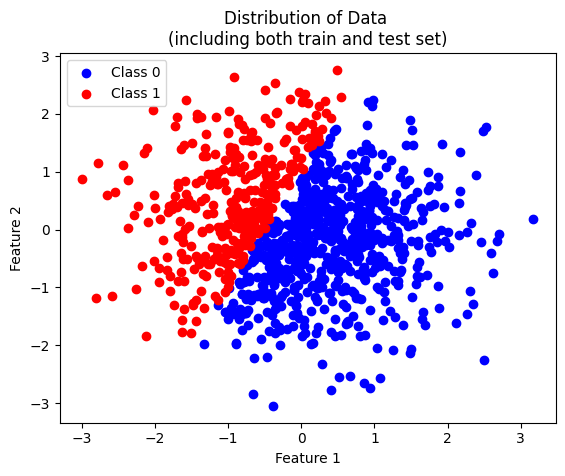

In [2]:
# Define a data
np.random.seed(0)
num_samples = 1000
X = np.random.randn(num_samples, 2)
Y = np.zeros((num_samples, 1))
Y[np.where(X[:,1] > 2*X[:,0] + 1)] = 1

# Split data into train and test sets
num_train = int(0.8 * num_samples)
X_train = X[:num_train, :]
Y_train = Y[:num_train, :]
X_test = X[num_train:, :]
Y_test = Y[num_train:, :]

# Plot the toy data
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], color='blue', label='Class 0')
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], color='red', label='Class 1')
plt.title('Distribution of Data \n(including both train and test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()


In [3]:
# Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def accuracy_calculation(y_pred, y_true):
  # Initialize the count of matching values
  match_count = 0

  # Loop over the predicted and true values and count the matches
  for i in range(len(y_pred)):
      if y_pred[i] >= 0.5:
        y_pred[i] = 1.
      else:
        y_pred[i] = 0.
      if y_pred[i] == y_true[i]:
          match_count += 1

  # Calculate the accuracy as the proportion of matches
  accuracy = match_count / len(y_pred)

  return accuracy

In [5]:
# Define the loss function (binary cross-entropy)
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [6]:
def weight_initializer_zeros(n_l, n_l_1):
  w = np.zeros((n_l, n_l_1), dtype=float)
  b = np.zeros((1, 1), dtype=float)
  return w, b

In [7]:
def weight_initializer_random(n_l, n_l_1):
  np.random.seed(3)
  w = np.random.randn(n_l, n_l_1)*10
  b = np.zeros((1, 1), dtype=float)
  return w, b

In [8]:
def weight_initializer_he(n_l, n_l_1):
  np.random.seed(3)
  w = np.random.randn(n_l, n_l_1)*np.sqrt(2/n_l_1)
  b = np.zeros((1, 1), dtype=float)
  return w, b

In [9]:
def logistic_regression(X_train, Y_train, epochs=10000, learning_rate=0.01, print_cost=False, kernel_initializer="he"):
  
  # Initialize parameters
  if kernel_initializer == "zeros":
    w, b = weight_initializer_zeros(2, 1)
  elif kernel_initializer == "random":
    w, b = weight_initializer_random(2, 1)
  else:
    w, b = weight_initializer_he(2, 1)

  cost_train = []
  cost_test = []
  accuracy_train = []
  accuracy_test = []
  # Loop over the training data for the specified number of epochs
  for i in range(epochs):
    # Compute the forward pass
    z = np.dot(X_train, w) + b
    y_pred = sigmoid(z)

    # Compute the loss
    loss = binary_cross_entropy(Y_train, y_pred)
    mean_loss = np.mean(loss)
    cost_train.append(mean_loss)

    accuracy_train.append(accuracy_calculation(y_pred, Y_train))
    # Compute the gradients of the loss with respect to the weights and bias
    dw = np.dot(X_train.T, (y_pred - Y_train)) / len(Y_train)
    db = np.mean(y_pred - Y_train)

    # Update the weights and bias
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # Print the loss every 100 epochs
    if print_cost:
      if i % 100 == 0:
          print(f"Epoch {i}, loss: {mean_loss}")

    # Compute the forward pass on the test data
    z_test = np.dot(X_test, w) + b
    y_pred_test = sigmoid(z_test)
    # Compute the binary cross-entropy loss on the test data
    test_loss = binary_cross_entropy(Y_test, y_pred_test)
    mean_test_loss = np.mean(test_loss)
    cost_test.append(mean_test_loss)
    accuracy_test.append(accuracy_calculation(y_pred_test, Y_test))
  
  cost_train = np.array(cost_train)
  cost_test = np.array(cost_test)
  accuracy_train = np.array(accuracy_train)
  accuracy_test = np.array(accuracy_test)

  # Print the train loss
  print(f"Train loss: {mean_loss}")
  # Print the test loss
  print(f"Test loss: {mean_test_loss}")
  
  
  return cost_train, cost_test, accuracy_train, accuracy_test

In [10]:
epochs=10000
cost_train_he, cost_test_he, accuracy_train_he, accuracy_test_he = logistic_regression(X_train, Y_train, epochs=epochs, learning_rate=0.001, print_cost=False, kernel_initializer="he")

Train loss: 0.5544057327383982
Test loss: 0.558027317902219


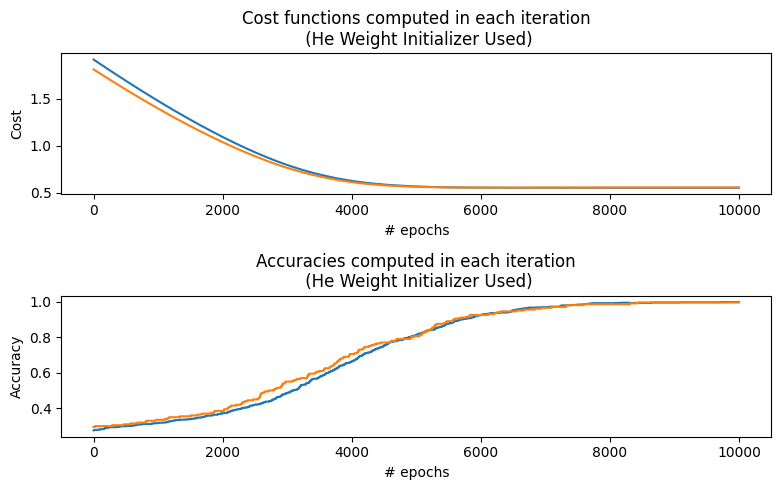

In [11]:
n_epochs = np.arange(0, epochs, 1)
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first subplot
axs[0].plot(n_epochs, cost_train_he, label='Train')
axs[0].plot(n_epochs, cost_test_he, label='Test')
axs[0].set_title("Cost functions computed in each iteration\n (He Weight Initializer Used)")
axs[0].set_xlabel("# epochs")
axs[0].set_ylabel("Cost")

# Plot the second subplot
axs[1].plot(n_epochs, accuracy_train_he, label='Train')
axs[1].plot(n_epochs, accuracy_test_he, label='Test')
axs[1].set_title("Accuracies computed in each iteration\n (He Weight Initializer Used)")
axs[1].set_xlabel("# epochs")
axs[1].set_ylabel("Accuracy")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [12]:
epochs=10000
cost_train_rand, cost_test_rand, accuracy_train_rand, accuracy_test_rand = logistic_regression(X_train, Y_train, epochs=epochs, learning_rate=0.001, print_cost=False, kernel_initializer="random")

Train loss: 7.2336336201670655
Test loss: 6.638810067906966


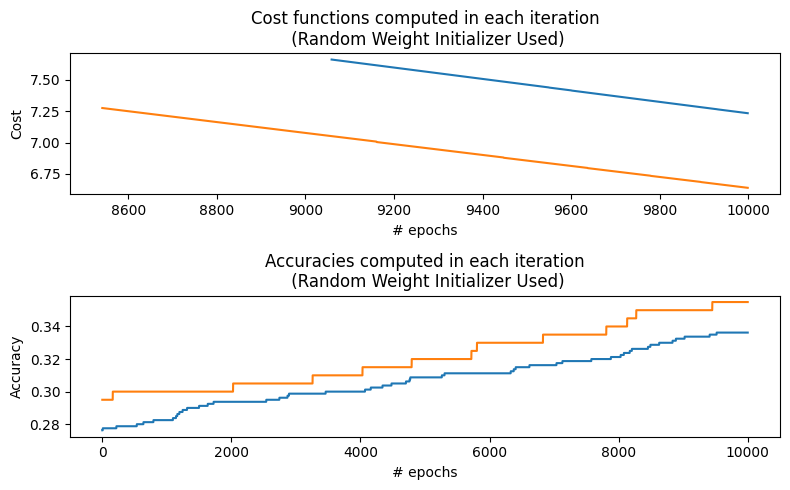

In [13]:
n_epochs = np.arange(0, epochs, 1)
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first subplot
axs[0].plot(n_epochs, cost_train_rand, label='Train')
axs[0].plot(n_epochs, cost_test_rand, label='Test')
axs[0].set_title("Cost functions computed in each iteration\n (Random Weight Initializer Used)")
axs[0].set_xlabel("# epochs")
axs[0].set_ylabel("Cost")

# Plot the second subplot
axs[1].plot(n_epochs, accuracy_train_rand, label='Train')
axs[1].plot(n_epochs, accuracy_test_rand, label='Test')
axs[1].set_title("Accuracies computed in each iteration\n (Random Weight Initializer Used)")
axs[1].set_xlabel("# epochs")
axs[1].set_ylabel("Accuracy")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()